In [1]:
install.packages("ggmap")

also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [82]:
install.packages("rgeos")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [22]:
#install.packages("sf")

also installing the dependencies ‘classInt’, ‘units’

Warning message in install.packages("sf"):
“installation of package ‘units’ had non-zero exit status”Warning message in install.packages("sf"):
“installation of package ‘sf’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [84]:
library(ggmap)
library(rgdal)
library(dplyr)
library(rgeos)
source('functions.R')

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.1-CAPI-1.13.3 
 Linking to sp version: 1.4-1 
 Polygon checking: TRUE 



In [17]:
plans = loadplans('data//Plans_Exeter.xml')

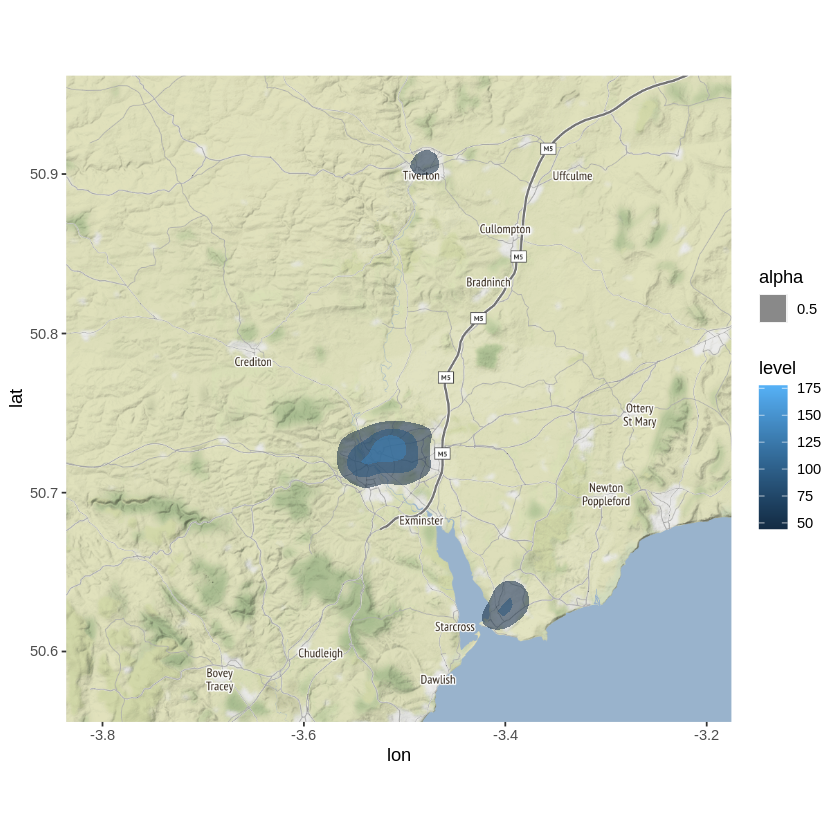

In [19]:
xmin=min(plans$x);xmax=max(plans$x);ymin=min(plans$y);ymax=max(plans$y)
map <- get_map(location = c(xmin,ymin,xmax,ymax),source="osm")

ggmap(map) +
stat_density2d(aes(x = x, y = y, fill = ..level.., alpha = 0.5),
bins = 5, geom = "polygon",
data = plans[plans$type=="home",])


In [25]:
msoas = readOGR(dsn = 'data/msoa',layer='EnglandWalesScotland_MSOAWGS84')

OGR data source with driver: ESRI Shapefile 
Source: "/home/jovyan/data/msoa", layer: "EnglandWalesScotland_MSOAWGS84"
with 8436 features
It has 2 fields


In [27]:
fmsoas = fortify(msoas)

Regions defined for each Polygons


In [29]:
fmsoas = fmsoas[fmsoas$long>xmin&fmsoas$long<xmax&fmsoas$lat>ymin&fmsoas$lat<ymax,]

In [56]:
homework = plans[!duplicated(plans[,c('x','y')]),]
homeworkpoints = SpatialPointsDataFrame(homework[,c('x','y')], homework, proj4string=CRS(proj4string(msoas)))

In [57]:
# overlay of points
homework$msoa = over(homeworkpoints,msoas)$MSOA11CD

In [71]:
flows=matrix(data=0,nrow=nrow(homework)/2,ncol=2)
for(i in seq(from = 1,to=nrow(homework)-2,by=2)){
    flows[i/2,]=c(as.character(homework$msoa[i]),as.character(homework$msoa[i+1]))
}

In [80]:
aggreg_flows = as.tbl(as.data.frame(flows)) %>% filter(V1!='NA'&V2!='NA') %>% group_by(V1,V2) %>% summarise(count=n())

In [90]:
msoacent = gCentroid(msoas,byid=T)
msoacentdf = as.tbl(data.frame(msoacent$x,msoacent$y,msoas$MSOA11CD))

In [92]:
aggreg_flows = left_join(aggreg_flows,msoacentdf,by=c('V1'='msoas.MSOA11CD'))

Warning message:
“Column `V1`/`msoas.MSOA11CD` joining factors with different levels, coercing to character vector”

In [93]:
aggreg_flows = left_join(aggreg_flows,msoacentdf,by=c('V2'='msoas.MSOA11CD'))

Warning message:
“Column `V2`/`msoas.MSOA11CD` joining factors with different levels, coercing to character vector”

In [136]:
# back to long format
flowsdf = matrix(data=rep(0,8*nrow(aggreg_flows)),nrow=2*nrow(aggreg_flows),ncol=4)
dim(flowsdf)
for(i in 2:nrow(aggreg_flows)){
    flowsdf[2*(i-1)-1,1]=as.numeric(aggreg_flows[i,4]);flowsdf[2*(i-1)-1,2]=as.numeric(aggreg_flows[i,5]);flowsdf[2*(i-1)-1,3]=as.numeric(aggreg_flows[i,3])/10;flowsdf[2*(i-1)-1,4]=i
    flowsdf[2*(i-1),1]=as.numeric(aggreg_flows[i,6]);flowsdf[2*(i-1),2]=as.numeric(aggreg_flows[i,7]);flowsdf[2*(i-1),3]=as.numeric(aggreg_flows[i,3])/10;flowsdf[2*(i-1),4]=i
}

[1] 3854    4

In [137]:
flowsdf = as.tbl(as.data.frame(flowsdf))
names(flowsdf)<-c('x','y','count','id')

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”

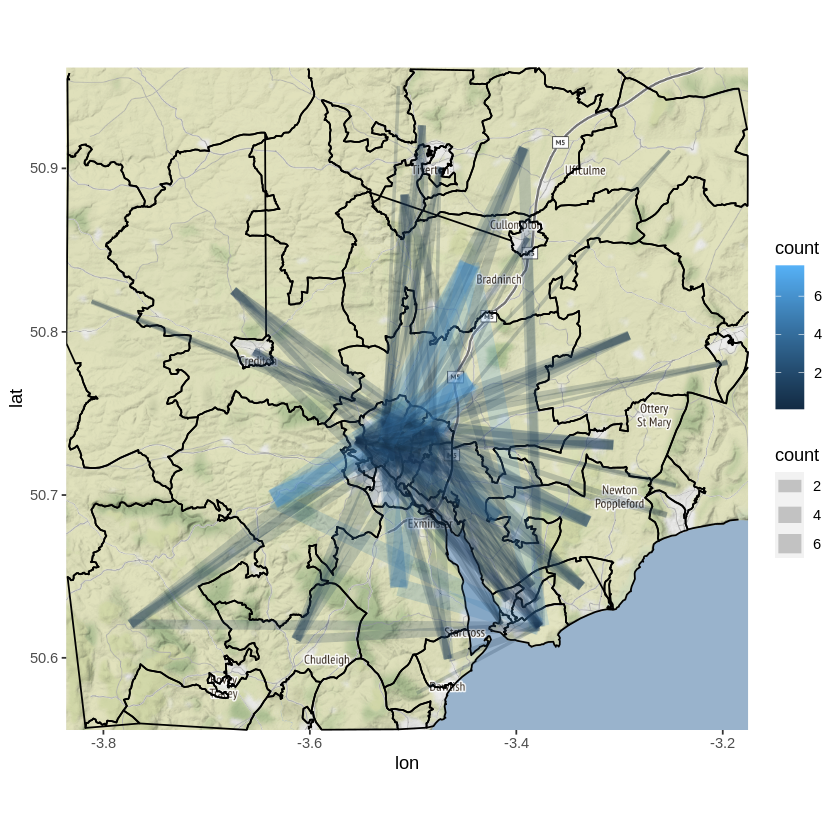

In [148]:
ggmap(map) + geom_path(fmsoas,mapping=aes(x=long,y=lat,group=id)) + geom_line(flowsdf[1200:1600,],mapping=aes(x=x,y=y,size=count,color=count,group=id),alpha=0.2)

In [141]:
#proj4string(msoas)
#head(homework)
#dim(homework)
#dim(flows)
#head(flows)
#homework$msoa[i]
#head(msoacentdf)
#aggreg_flows
#c(aggreg_flows[i,4:5])
#a = c(c(aggreg_flows[i,4:5]),c(aggreg_flows[i,3]),i)
#length(a)
#flowsdf = matrix(data=0,nrow=2*nrow(aggreg_flows),ncol=4)
#dim(flowsdf)
#flowsdf[1,]=a
#as.numeric(aggreg_flows[i,4])
dim(flowsdf)

[1] 3854    4

In [37]:
#tail(raw,n = 100)
head(plans[!duplicated(plans[,c('x','y')]),])
dim(plans)

,x,y,start,end,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-3.546032,50.73042,0.000000,9.800000,home
2,-3.671208,50.68025,9.800000,18.633333,work
4,-3.386551,50.63855,0.000000,7.083333,home
5,-3.330779,50.69089,7.083333,17.250000,work
7,-3.234335,50.76015,0.000000,7.966667,home
8,-3.670035,50.69337,7.966667,19.400000,work


[1] 98148     5

In [21]:
help(get_map)

get_map {ggmap},R Documentation
location,"an address, longitude/latitude pair (in that order), or left/bottom/right/top bounding box"
zoom,"map zoom, an integer from 3 (continent) to 21 (building), default value 10 (city). openstreetmaps limits a zoom of 18, and the limit on stamen maps depends on the maptype. ""auto"" automatically determines the zoom for bounding box specifications, and is defaulted to 10 with center/zoom specifications. maps of the whole world currently not supported."
scale,scale argument of get_googlemap or get_openstreetmap
maptype,"character string providing map theme. options available are ""terrain"", ""terrain-background"", ""satellite"", ""roadmap"", and ""hybrid"" (google maps), ""terrain"", ""watercolor"", and ""toner"" (stamen maps), or a positive integer for cloudmade maps (see ?get_cloudmademap)"
source,"Google Maps (""google""), OpenStreetMap (""osm""), Stamen Maps (""stamen"")"
force,force new map (don't use archived version)
messaging,turn messaging on/off
urlonly,return url only
filename,destination file for download (file extension added according to format). Default NULL means a random tempfile.
crop,(stamen and cloudmade maps) crop tiles to bounding box
